# Predicting HEART DISEASE

About
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.


Attribute Information:

> 1.age = age in years

> 2.sex= (1 = male; 0 = female)

> 3.cp = chest pain type

> 4.trestbpsr = esting blood pressure (in mm Hg on admission to the hospital)

> 5.chol = serum cholestoral in mg/dl

> 6.fbs = (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

> 7.restecg = resting electrocardiographic results

> 8.thalach = maximum heart rate achieved

> 9.exang = exercise induced angina (1 = yes; 0 = no)

> 10.oldpeak = ST depression induced by exercise relative to rest

> 11.slope = the slope of the peak exercise ST segment

> 12.ca = number of major vessels (0-3) colored by flourosopy

> 13.thal = 3 = normal; 6 = fixed defect; 7 = reversable defect

> 14.target = 1 or 0

# Data Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv('heart.csv')

In [3]:
data.head

<bound method NDFrame.head of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1      

In [4]:
print(data.shape)

(303, 14)


In [5]:
# The number of rows and columns are
print("The number of rows",data.shape[0])
print("The number of columns",data.shape[1])

The number of rows 303
The number of columns 14


In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


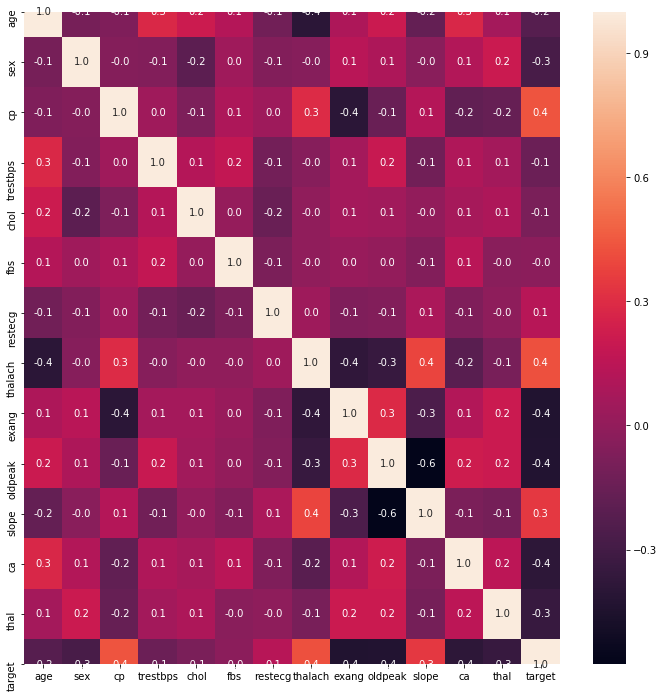

In [8]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot=True, fmt='.1f')
plt.show()

## Getting the top most common age

In [9]:
data.age.value_counts()[:10]

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
Name: age, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

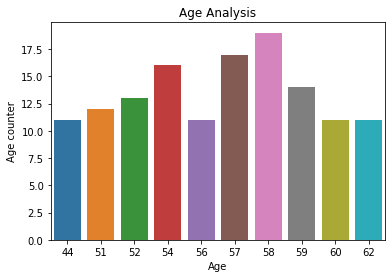

In [10]:
sns.barplot(x= data.age.value_counts()[:10].index, y= data.age.value_counts()[:10].values)
plt.xlabel('Age')
plt.ylabel("Age counter")
plt.title("Age Analysis")
plt.show

In [11]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [12]:
countNoDisease = len(data[data.target == 0])
countHaveDisease = len(data[data.target == 1])
print("Percentage of patients dont have heart disease: {:.2f}%".format((countNoDisease/(len(data.target)))*100))
print("Percentage of patients have heart disease: {:.2f}%".format((countHaveDisease/(len(data.target)))*100))

Percentage of patients dont have heart disease: 45.54%
Percentage of patients have heart disease: 54.46%


In [13]:
countFemale= len(data[data.sex == 0])
countMale = len(data[data.sex == 1])
print("% of Female Patients: {:.2f}%".format((countFemale/(len(data.sex))*100)))
print("% of male Patients: {:.2f}%".format((countMale/(len(data.sex))*100)))

% of Female Patients: 31.68%
% of male Patients: 68.32%


In [14]:
young_ages = data[(data.age>=29)&(data.age<40)]
middle_ages = data[(data.age>=40)&(data.age<55)]
elderly_ages = data[(data.age>=55)]
print("young ages", len(young_ages))
print("middle ages", len(middle_ages))
print("elderly ages", len(elderly_ages))

young ages 16
middle ages 128
elderly ages 159


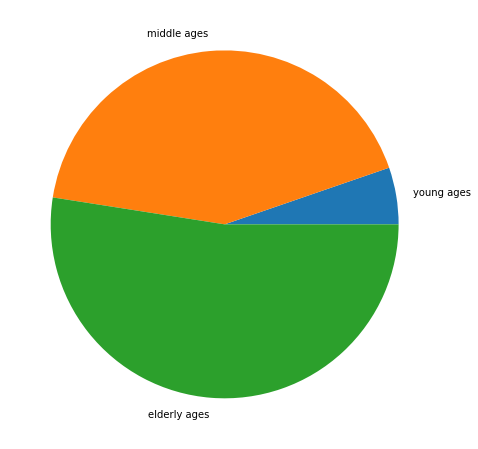

In [15]:
colors = ['blue','green', 'red']
explode= [1,1,1]
plt.figure(figsize= (8,8))
plt.pie([len(young_ages), len(middle_ages), len(elderly_ages)], labels=['young ages', 'middle ages', 'elderly ages'])
plt.show()

In [16]:
#chest pain analysis
data.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [17]:
data.target.unique()

array([1, 0], dtype=int64)

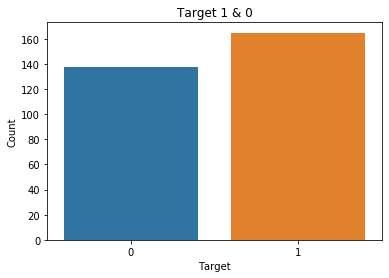

In [18]:
sns.countplot(data.target)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Target 1 & 0')
plt.show()

In [19]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [20]:
from sklearn.linear_model import LogisticRegression
x_data = data.drop(['target'], axis = 1)
y = data.target.values

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y, test_size = 0.2, random_state= 0)

In [22]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
print('Test Accuracy {:.2f}%'.format(lr.score(x_test, y_test)*100))

Test Accuracy 85.25%


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [23]:
#KNN model
from sklearn.neighbors import KNeighborsClassifier
knn =  KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
print("KNN accuracy: {:.2f}%".format(knn.score(x_test, y_test)*100))

KNN accuracy: 63.93%


In [ ]:
# support vector
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(x_train, y_train)
print("SVC accuracy: {:.2f}%".format(svm.score(x_test, y_test)*100))